In [1]:
%matplotlib inline

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import cPickle

plt.style.use(['ggplot'])
plt.rc("font", size=16)
plt.rc("axes", labelcolor="black")
plt.rc("lines", linewidth=2)
plt.rc("figure", figsize=(10, 6.5))

/usr/local/lib64/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
stats = {}
for n in [2, 4, 8]:
    f = open("s3/c3xl_{:d}nodes.pkl".format(n))
    stats[n] = cPickle.load(f)
    f.close()

In [9]:
def plot_combined_stats(stats):
    for stats_entry in stats:
        if stats_entry['Label'] == "CPUUtilization":
            values = [x['Average'] for x in stats_entry['Datapoints']]
            times = [x['Timestamp'] for x in stats_entry['Datapoints']]

            sort_order = np.argsort(times)
            time_deltas = deltas = np.array(times)[sort_order] - min(times)
            plt.plot(np.array([x.total_seconds() for x in time_deltas])/60.0, np.array(values)[sort_order], '-')

    min_cpu_time = min(times)
    plt.ylim(0, 100)
    plt.ylabel("CPU Utilization")
    plt.xlabel("Time (minutes)")

    ax2 = plt.gca().twinx()

    for stats_entry in stats:
        if stats_entry['Label'] == "BytesDownloaded":
            values = [x['Sum'] for x in stats_entry['Datapoints']]
            times = [x['Timestamp'] for x in stats_entry['Datapoints']]

            sort_order = np.argsort(times)
            time_deltas = deltas = np.array(times)[sort_order] - min_cpu_time
            ax2.plot(np.array([x.total_seconds() for x in time_deltas])/60.0, np.array(values)[sort_order], '-', lw=3)

    ax2.set_ylabel("Bytes Downloaded (per min?)")


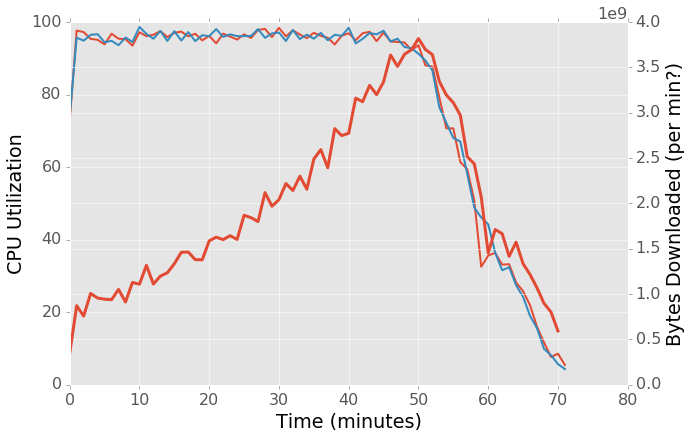

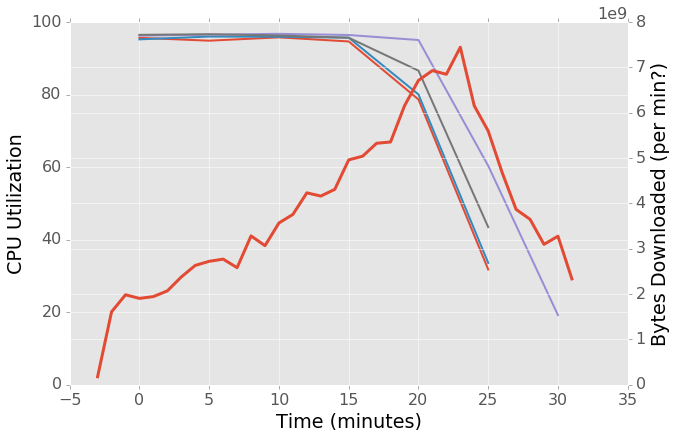

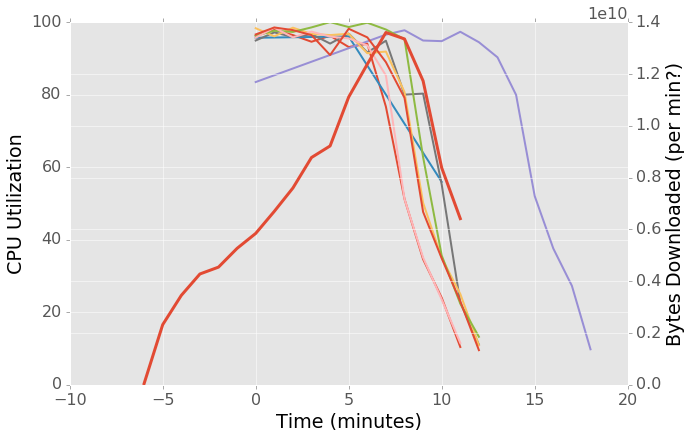

In [12]:
plot_combined_stats(stats[2])
plt.show()
plot_combined_stats(stats[4])
plt.show()
plot_combined_stats(stats[8])
plt.show()


Total Size: 134.99 GB
Total Size: 141.42 GB
Total Size: 136.62 GB


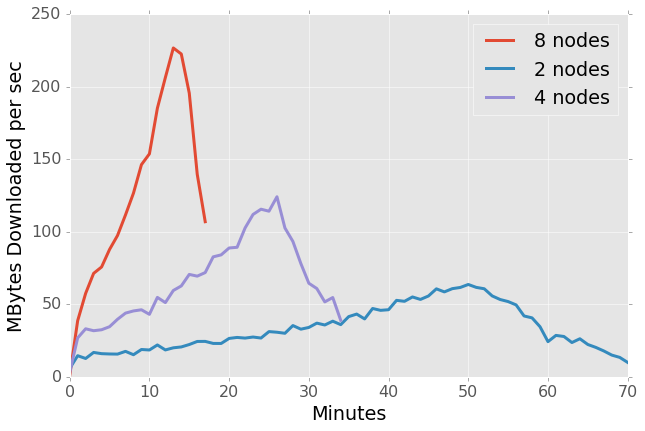

In [24]:
ax = plt.gca()
for n, this_cluster_stats in stats.items():
    for stats_entry in this_cluster_stats:
        if stats_entry['Label'] == "BytesDownloaded":
            values = [x['Sum'] for x in stats_entry['Datapoints']]
            times = [x['Timestamp'] for x in stats_entry['Datapoints']]

            sort_order = np.argsort(times)
            time_deltas = np.array(times)[sort_order]
            time_deltas -= min(time_deltas)
            bytes_downloaded_per_min = np.array(values)[sort_order]
            mb_per_sec = bytes_downloaded_per_min/60.0/1e6
            ax.plot(np.array([x.total_seconds() for x in time_deltas])/60.0, mb_per_sec, '-', lw=3,
                   label="{:d} nodes".format(n))
            print("Total Size: {:.2f} GB".format(np.sum(mb_per_sec)*60/1000.0))

ax.set_ylabel("MBytes Downloaded per sec")
ax.set_xlabel("Minutes")
ax.legend()

Total Size: 134.99 GB
Total Size: 141.42 GB
Total Size: 136.62 GB


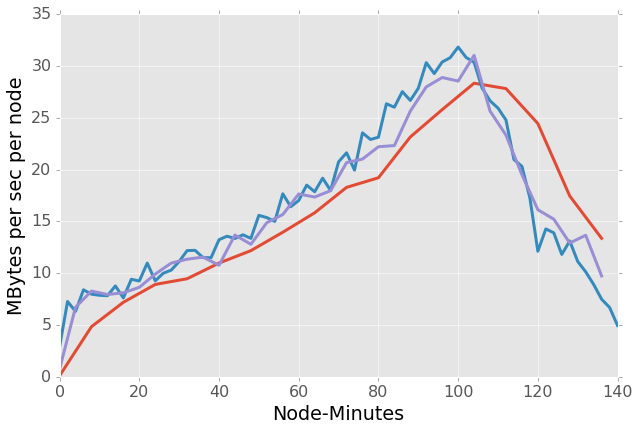

In [27]:
ax = plt.gca()
for n, this_cluster_stats in stats.items():
    for stats_entry in this_cluster_stats:
        if stats_entry['Label'] == "BytesDownloaded":
            values = [x['Sum'] for x in stats_entry['Datapoints']]
            times = [x['Timestamp'] for x in stats_entry['Datapoints']]

            sort_order = np.argsort(times)
            time_deltas = np.array(times)[sort_order]
            time_deltas -= min(time_deltas)
            bytes_downloaded_per_min = np.array(values)[sort_order]
            mb_per_sec = bytes_downloaded_per_min/60.0/1e6
            ax.plot(np.array([x.total_seconds() for x in time_deltas])/60.0*n, mb_per_sec/n, '-', lw=3,
                   label="{:d} nodes".format(n))
            print("Total Size: {:.2f} GB".format(np.sum(mb_per_sec)*60/1000.0))

ax.set_ylabel("MBytes per sec per node")
ax.set_xlabel("Node-Minutes")
